<h1 align="center">Анализ данных для прогнозирования цен на автомобили</h1>

<h3>Импорт библиотек:</h3>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("✅ Библиотеки загружены!")

✅ Библиотеки загружены!


<h3>Импортируем Dataset:</h3>

In [2]:
current_dir = os.getcwd()
print(f"Текущая папка: {current_dir}")

project_root = os.path.dirname(os.getcwd())
data_path = os.path.join(project_root, 'data', 'raw', 'car_data.csv')
print(f"Путь к данным: {data_path}")

df = pd.read_csv(data_path)
print(f"✅ Данные загружены: {df.shape[0]} строк, {df.shape[1]} столбцов")

Текущая папка: C:\Users\airat.tagirov\Desktop\CarPricePrediction\notebooks
Путь к данным: C:\Users\airat.tagirov\Desktop\CarPricePrediction\data\raw\car_data.csv
✅ Данные загружены: 205 строк, 26 столбцов


<h3>Первый осмотр данных:</h3>
<h4>Смотрим типы данных и есть ли пропуски</h4>

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

print("\n🔍 Пропущенные значения:")
missing = df.isnull().sum()
print(missing[missing > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
print("📈 Статистика числовых признаков:")
df.describe()

📈 Статистика числовых признаков:


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<h3>Смотрим распределение цен автомобилей</h3>

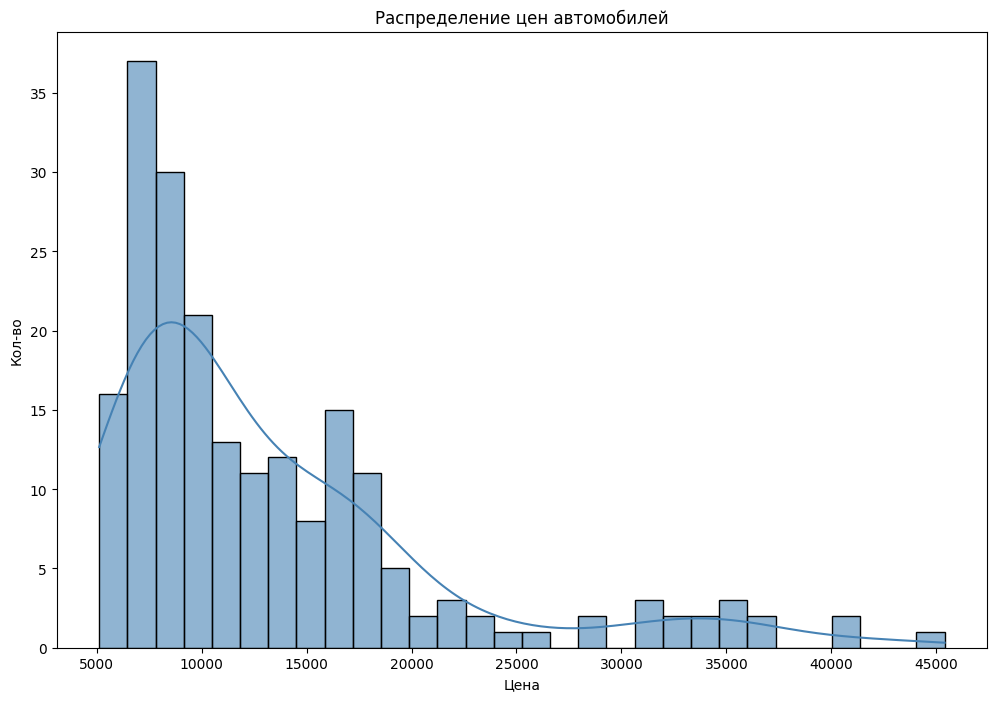

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(df['price'], kde = True, bins=30, alpha=0.6, color='steelblue')
plt.title('Распределение цен автомобилей')
plt.xlabel('Цена')
plt.ylabel('Кол-во')
plt.show()

<h3>Смотрим распределение цен среди авто одного кузова</h3>

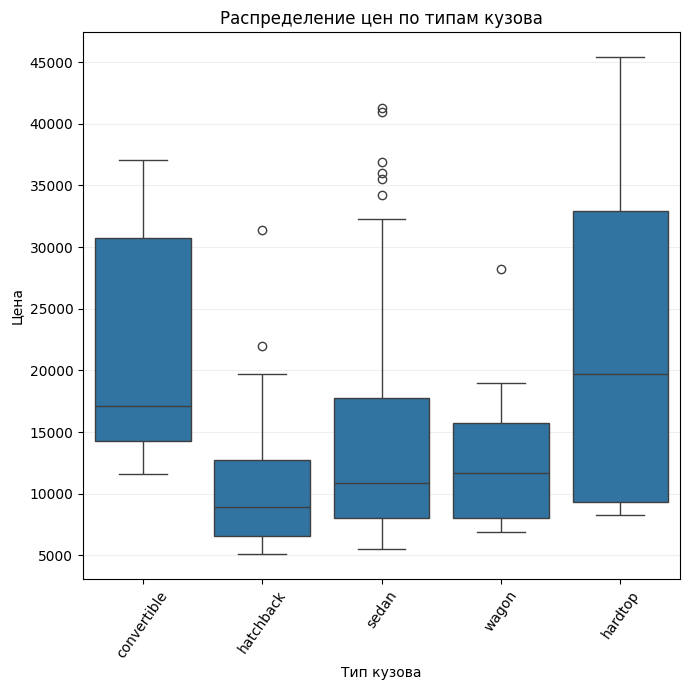

💵 Средняя цена по типам кузова:
carbody
hardtop        22208.500000
convertible    21890.500000
sedan          14344.270833
wagon          12371.960000
hatchback      10376.652386
Name: price, dtype: float64


In [72]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=df, x='carbody', y='price', hue='carbody', palette=['#1f77b4'] * len(df['carbody'].unique()), 
            legend=False)
plt.title('Распределение цен по типам кузова')
plt.ylabel('Цена')
plt.xlabel('Тип кузова')
plt.xticks(rotation=55)
plt.tight_layout()
plt.grid(axis='y', alpha=0.2)

plt.show()

print("💵 Средняя цена по типам кузова:")
print(df.groupby('carbody')['price'].mean().sort_values(ascending=False))

<h3>Строим тепловую карту и анализируем корреляции</h3>

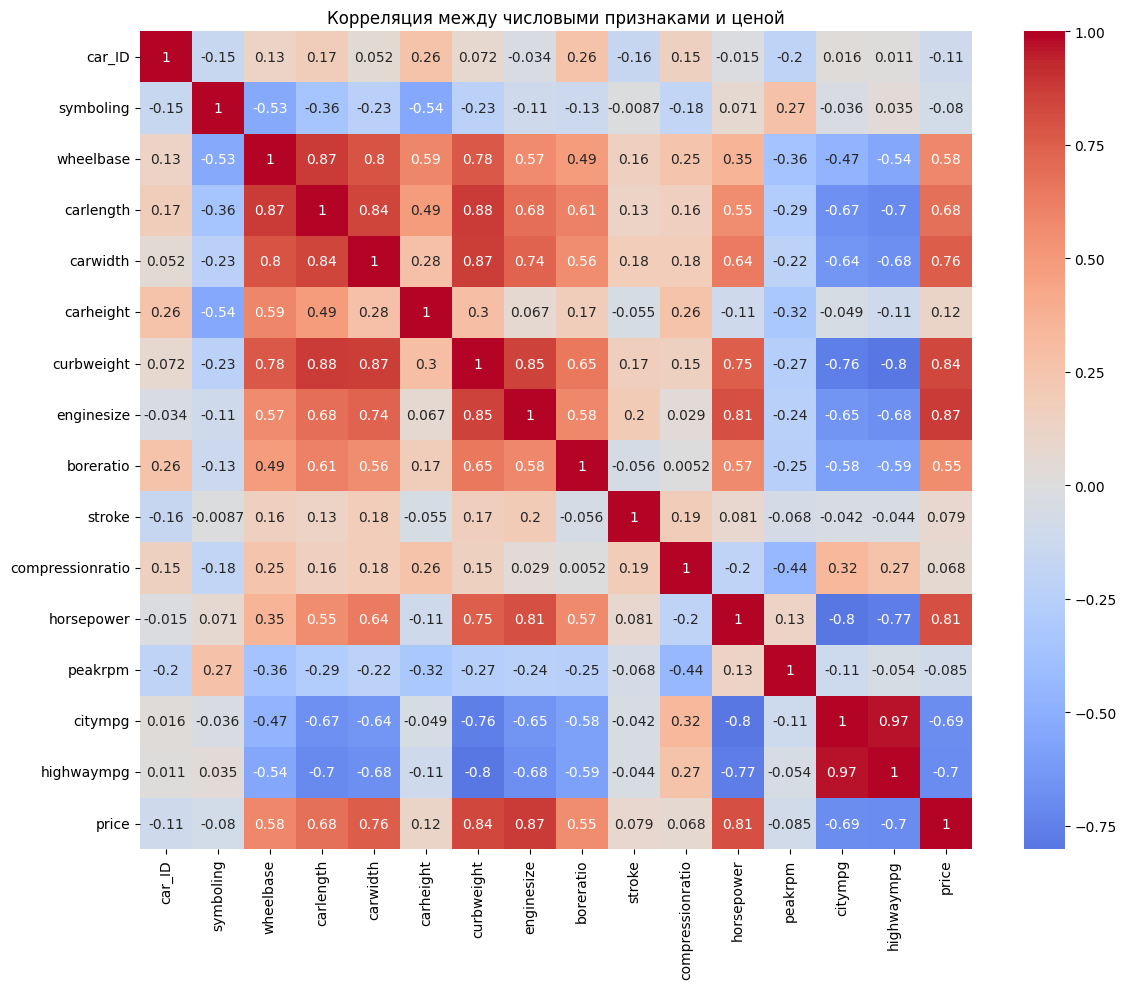

In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция между числовыми признаками и ценой')
plt.tight_layout()
plt.show()

In [9]:
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("📈 Топ признаков по корреляции с ценой:")
print(price_correlations)

📈 Топ признаков по корреляции с ценой:
price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


<h3>Исправляем опечатки в моделях и создаем отдельный столбец с марками </h3>

In [10]:
brand_correction = {
    'maxda': 'mazda',
    'porcshce': 'porsche', 
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

df['CarName'] = df['CarName'].replace(brand_correction, regex = True)

df['CarName'] = df['CarName'].str.lower()

print(df['CarName'].str.split().str[0].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [11]:
df['brand'] = df['CarName'].str.split().str[0]

print(df['brand'])

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: brand, Length: 205, dtype: object


<h3>Смотрим распределение цен по брендам</h3>

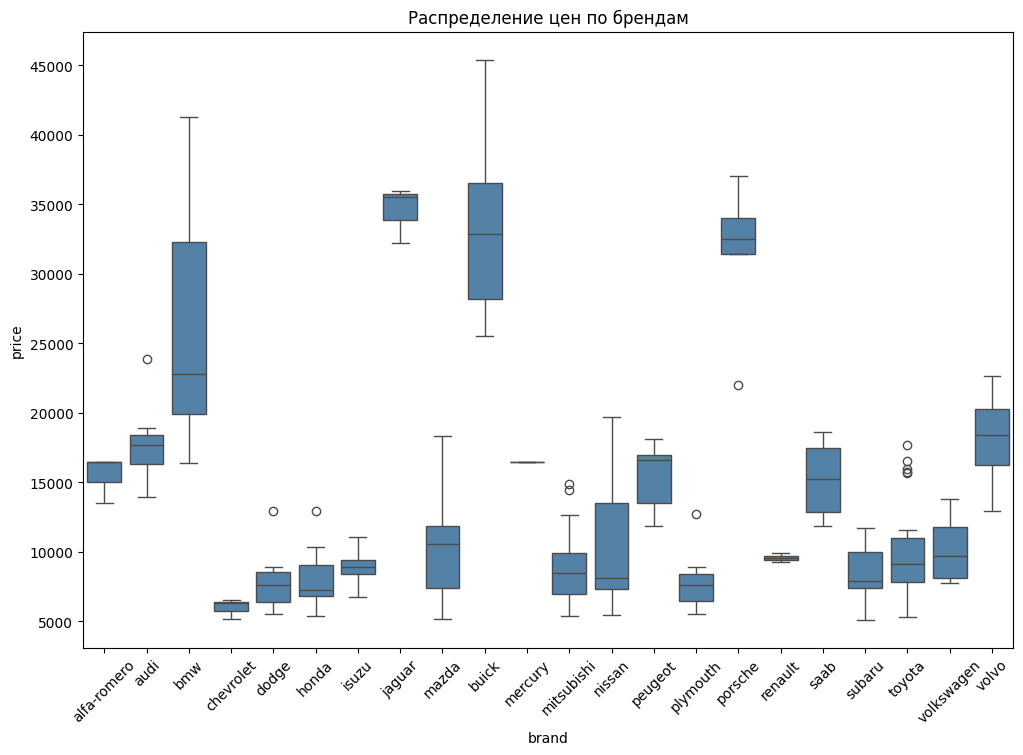

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='brand', y='price', color='steelblue')
plt.xticks(rotation=45)
plt.title('Распределение цен по брендам')
plt.show()

<h3>Смотрим кол-во уникальных категориальных признаков в столбцах</h3>

In [13]:
print('Кол-во уникальных ')
print(df.select_dtypes(include=['object']).nunique())

Кол-во уникальных 
CarName           142
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
brand              22
dtype: int64


<h3>Смотрим на Кол-во авто одной марки</h3>

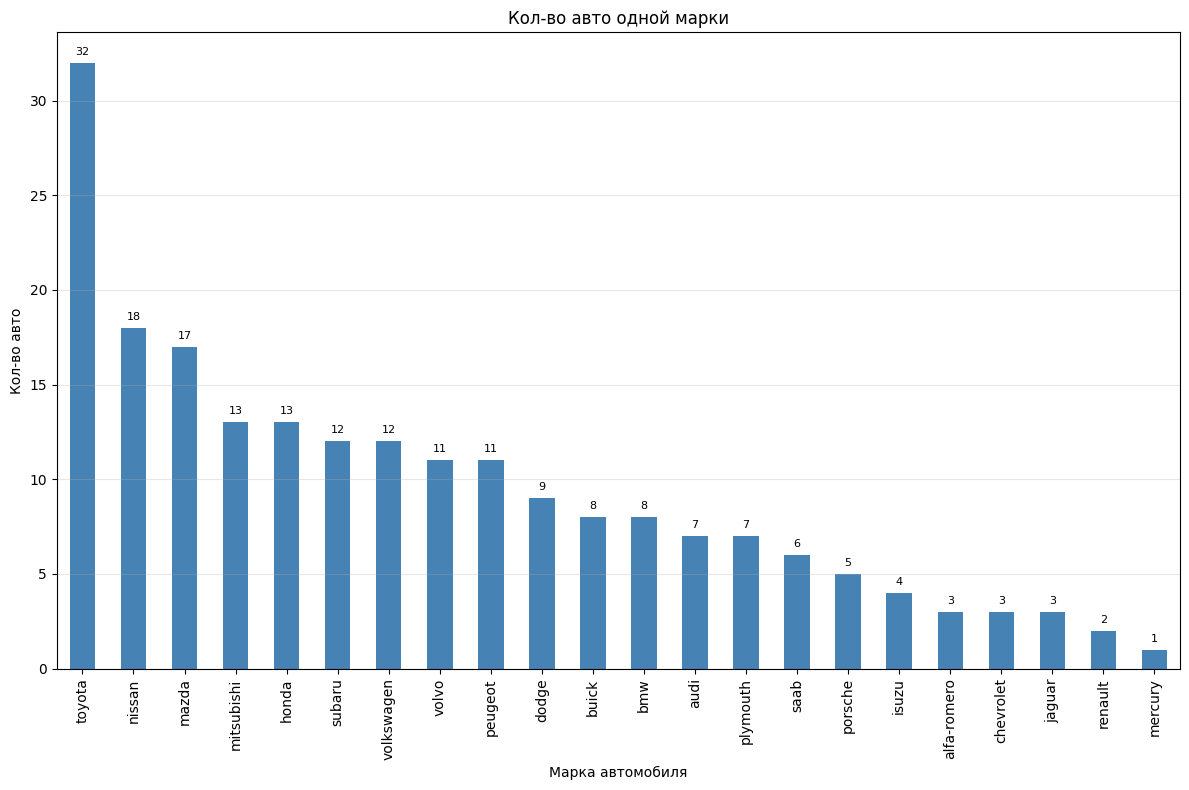

In [37]:
brand_count = df['brand'].value_counts()

plt.figure(figsize=(12,8))
brand_count.plot(kind='bar', color='steelblue')
plt.title('Кол-во авто одной марки')
plt.xlabel('Марка автомобиля')
plt.ylabel('Кол-во авто')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(brand_count):
    plt.text(i, v + brand_count.max()*0.01, f'{v:,.0f}', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

<h3>Смотрим на Ср. стоимость авто одной марки</h3>

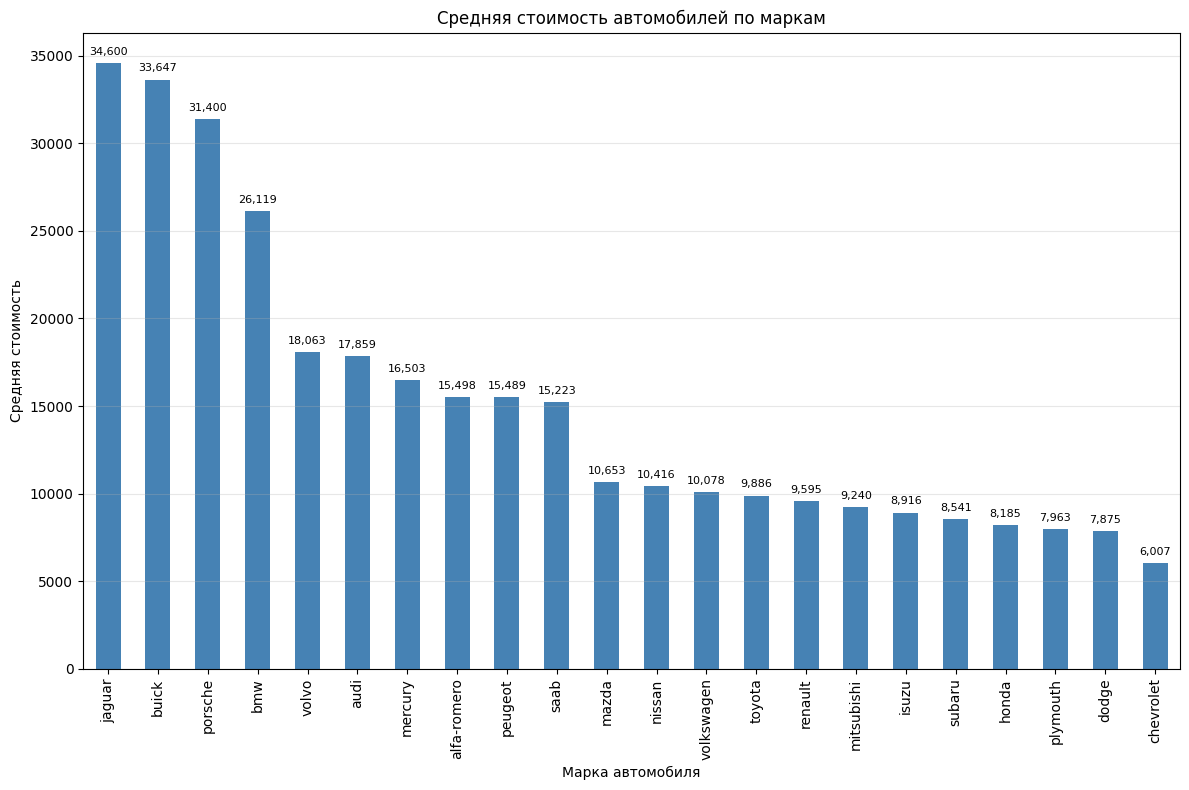

In [33]:
brand_prices = df.groupby('brand')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
brand_prices.plot(kind='bar', color='steelblue')
plt.title('Средняя стоимость автомобилей по маркам')
plt.ylabel('Средняя стоимость')
plt.xlabel('Марка автомобиля')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(brand_prices):
    plt.text(i, v + brand_prices.max()*0.01, f'{v:,.0f}', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()